In [10]:
from HPA_CC.data.dataset import RefClsPseudo
from pathlib import Path
import numpy as np

In [11]:
data_dir = Path("/data/ishang/FUCCI-dataset-well/")
name = "minimal_512"
hpa = True
ds = RefClsPseudo(data_dir, name, hpa=hpa, label="phase", scope=True)
X, Y = ds[:]
X, Y = X.numpy(), Y.numpy()

Loading /data/ishang/FUCCI-dataset-well/embeddings_minimal_512_dino_hpa.pt
Loading /data/ishang/FUCCI-dataset-well/minimal_512_sample_phase_scope.pt
tensor(0., dtype=torch.float64) tensor(1.6130, dtype=torch.float64)
X shape: torch.Size([36748, 1536])
Y shape: torch.Size([36748, 4])


[0.368527   0.1980279  0.14816575 0.07581621 0.05179815 0.03325854
 0.02008719 0.0130814  0.01208955 0.01077902]
0.9316307036206126


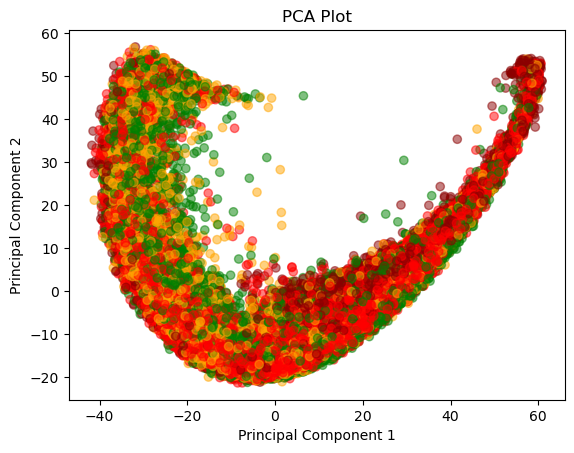

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Perform PCA
scaler = StandardScaler()
pca = PCA(n_components=10)
X_pca = pca.fit_transform(scaler.fit_transform(X))
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# Plot the data
color_map = {0: 'darkred', 1: 'red', 2: 'orange', 3: 'green'}
colors = [color_map[np.argmax(y)] for y in Y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()


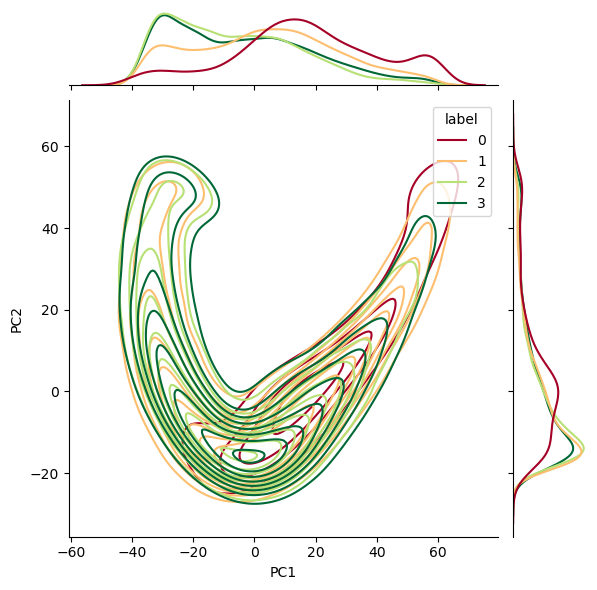

In [13]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'label': [np.argmax(y) for y in Y]})
sns.jointplot(data=df, x='PC1', y='PC2', hue='label', kind='kde', palette="RdYlGn", marginal_kws=dict(common_norm=False))

Loading /data/ishang/FUCCI-dataset-well/embeddings_minimal_512_dino_hpa.pt
Loading /data/ishang/FUCCI-dataset-well/minimal_512_sample_pseudotime.pt
tensor(0., dtype=torch.float64) tensor(1., dtype=torch.float64)
X shape: torch.Size([36748, 1536])
Y shape: torch.Size([36748])


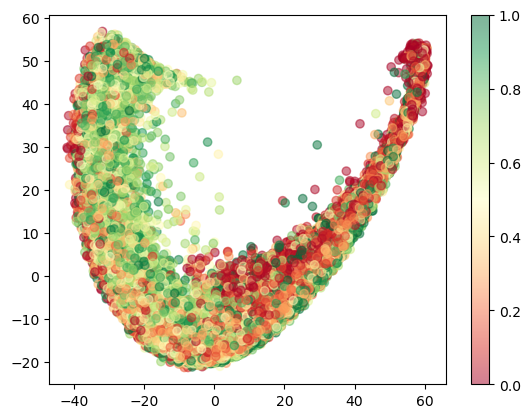

In [14]:
data_dir = Path("/data/ishang/FUCCI-dataset-well/")
ds = RefClsPseudo(data_dir, name, hpa=hpa, label="pseudotime")
X, Y = ds[:]
X, Y = X.numpy(), Y.numpy()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, alpha=0.5, cmap='RdYlGn')
plt.colorbar()

/home/ishang/miniconda3/envs/hpa-cc-copy/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/ishang/miniconda3/envs/hpa-cc-copy/lib/python3.9/site-packages/seaborn/axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


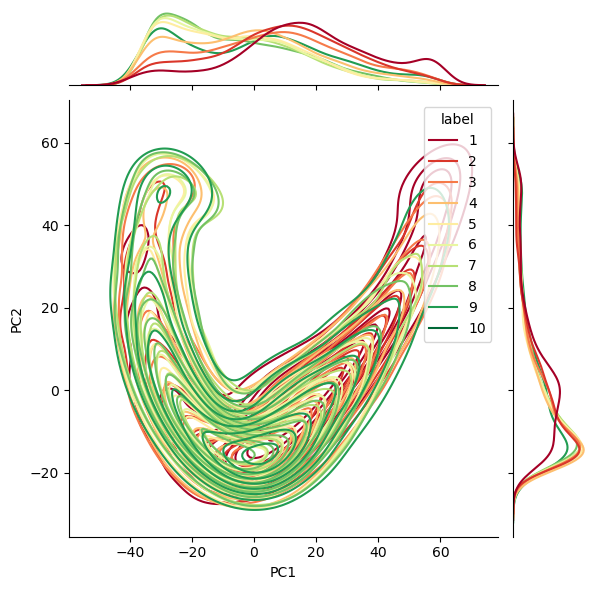

In [15]:
# Bucket the pseudotime into 10 bins
binned_Y = np.digitize(Y, bins=np.linspace(0, 1, 10))

# Create a new dataframe with binned pseudotime
df_binned = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'label': binned_Y})

# Create a jointplot
sns.jointplot(data=df_binned, x='PC1', y='PC2', hue='label', kind='kde', palette="RdYlGn", marginal_kws=dict(common_norm=False))


/tmp/ipykernel_4040493/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_4040493/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_4040493/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
/tmp/ipykernel_4040493/713738050.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_binned, x

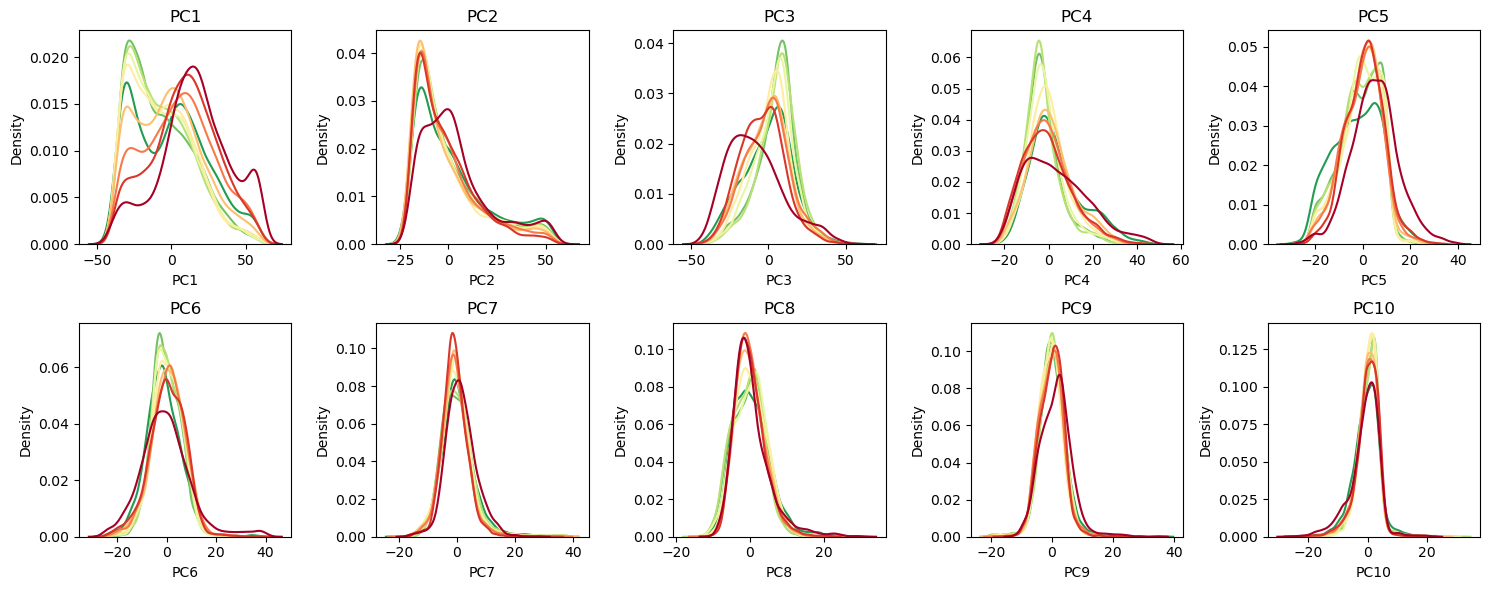

In [16]:
import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

df_binned = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
df_binned['label'] = binned_Y

# Iterate over the PCs
for i in range(10):
    # Select the subplot
    ax = axes[i // 5, i % 5]
    
    # Create a KDE plot for the binned pseudotime of the current PC
    sns.kdeplot(data=df_binned, x=f'PC{i+1}', hue='label', ax=ax, palette="RdYlGn", common_norm=False, legend=False)
    
    # Set the title of the subplot
    ax.set_title(f'PC{i+1}')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
